# Life Expectancy and GDP Analysis

In this project, I'll analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

## Import Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

df = pd.read_csv('all_data.csv')

## Exploratory Data Analysis

First, I'll explore the type of data stored using `.info()`

In [2]:
print('-------------------Column Info-------------------')
print(df.info())

print('-------------------Countries-------------------')
print(df.Country.value_counts())

print('-------------------Years-------------------')
print(df.Year.value_counts())
print(f'\nThere are {len(df.Year.value_counts())} years entered in this DataFrame')

df.replace("United States of America", "USA", inplace=True)

-------------------Column Info-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
-------------------Countries-------------------
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64
-------------------Years-------------------
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009   

The DataFrame consists of exactly 96 entries with information on countries, years, life expectancy and GDP. Exploring the `Country` and `Year` columns, there are exactly 6 countries with 16 entries each, and 16 years with 6 entries each. 

Based on this one can suspect all six countries are represented once in each of the 16 years, making up the 96 entries in total. This I'll verify when visualizing the data.

Next, I'll plot the information from the different columns, to visualize the distribution of the values.

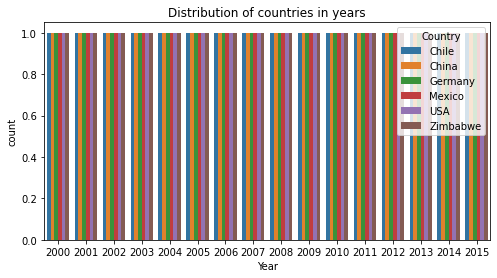

<Figure size 432x288 with 0 Axes>

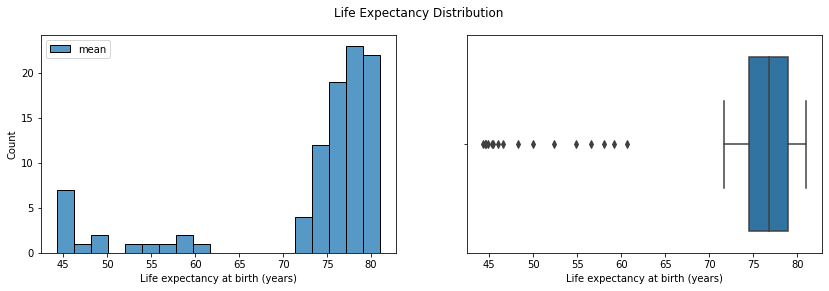

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64


<Figure size 432x288 with 0 Axes>

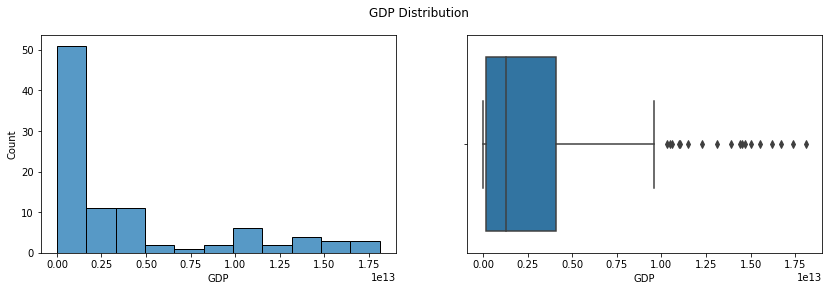

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64


<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure(figsize = (8,4))
sn.countplot(data = df, x = 'Year', hue = 'Country')
plt.title('Distribution of countries in years')
plt.show()
plt.clf()

plt.figure(figsize = (14,4))
plt.suptitle('Life Expectancy Distribution')
plt.subplot(1,2,1)
sn.histplot(data = df, x = 'Life expectancy at birth (years)')
plt.legend(['mean'])
plt.subplot(1,2,2)
sn.boxplot(data = df, x = 'Life expectancy at birth (years)')
plt.show()
plt.clf()

print(df['Life expectancy at birth (years)'].describe())

plt.figure(figsize = (14,4))
plt.suptitle('GDP Distribution')
plt.subplot(1,2,1)
sn.histplot(data = df, x = 'GDP')

plt.subplot(1,2,2)
sn.boxplot(data = df, x = 'GDP')
plt.show()
plt.clf()

print(df.GDP.describe())

Based on the initial EDA, I can confirm that the countries are equally represented in each of the 16 years in the dataset (i.e. each country appears once per year).

Moreover, the counts of GDP and life expectancy are inversely related: there are more high life expectancy counts and more low GDPs. Whether these counts translate to a correlation between these two variables is what I'll in the following bivariate analyses.

## Analysis

In the following subsections I'll explore the relationships between the variables of this dataset, especially between the GDP and life expectancy of six countries. 

### Countries ~ Life Expectancy
**Q:** How does life expectancy vary between the six countries?

    Country  Life expectancy at birth (years)
0   Germany                          79.65625
1     Chile                          78.94375
2       USA                          78.06250
3    Mexico                          75.71875
4     China                          74.26250
5  Zimbabwe                          50.09375


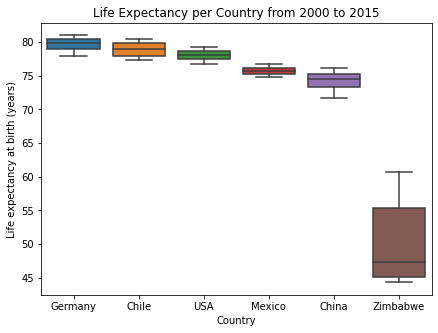

Life expectancies for Chile, China, Germany, Mexico and the US: 
Mean: 50.09 
Standard deviation: 2.27

Life expectancy for Zimbabwe: 
Mean: 77.33 
Standard deviation: 5.94


In [4]:
import statistics as st

group_lf = df['Life expectancy at birth (years)'].groupby(df.Country).mean().sort_values(ascending = False).reset_index()
print(group_lf)

plt.figure(figsize = (7,5))
plt.title('Life Expectancy per Country from 2000 to 2015')
sn.boxplot(data = df, x = 'Country', y = 'Life expectancy at birth (years)', order = group_lf.Country)
locs, labels=plt.xticks()
plt.show()

mean_lf_no_Z = st.mean(group_lf['Life expectancy at birth (years)'][0:5])
std_lf_no_Z = st.stdev(group_lf['Life expectancy at birth (years)'][0:5])
mean_Z = st.mean(df.loc[df.Country == 'Zimbabwe']['Life expectancy at birth (years)'])
std_Z = st.stdev(df.loc[df.Country == 'Zimbabwe']['Life expectancy at birth (years)'])

mean_lf_no_Z = np.mean(group_lf['Life expectancy at birth (years)'][0:5])
mean_Z = np.mean(group_lf.iloc[[5]]['Life expectancy at birth (years)'])

print('Life expectancies for Chile, China, Germany, Mexico and the US:',
        f'\nMean: {round(mean_Z, 2)}',
        f'\nStandard deviation: {round(std_lf_no_Z, 2)}')

print('\nLife expectancy for Zimbabwe:',
        f'\nMean: {round(mean_lf_no_Z, 2)}',
        f'\nStandard deviation: {round(std_Z, 2)}')

**A:** Germany, Chile, USA, Mexico and China have the highest life expectancies in the dataset, while Zimbabwe has the lowest. This confirms that the Zimbabwe forms the outlier observed in the above EDA.

### Country ~ GDP
**Q:** How does GDP vary among the countries listed? 

    Country           GDP
0       USA  1.407500e+13
1     China  4.957714e+12
2   Germany  3.094776e+12
3    Mexico  9.766506e+11
4     Chile  1.697888e+11
5  Zimbabwe  9.062580e+09


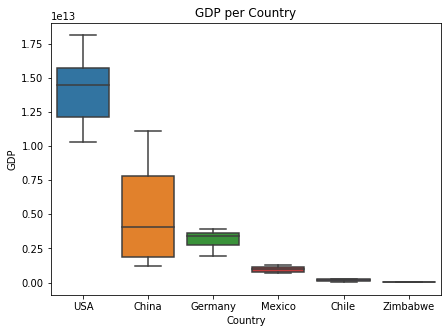

GDP for the US: 
Mean: 14T 
Standard deviation: 2.43T

GDP for China and Germany: 
Mean: 4.03T 
Standard deviation: 1.32T

GDP for Mexico, Chile and Zimbabwe: 
Mean: 385.17B 
Standard deviation: 518.51B


In [7]:
import statistics as st

group_gdp = df['GDP'].groupby(df.Country).mean().sort_values(ascending = False).reset_index()
print(group_gdp)

plt.figure(figsize = (7,5))
plt.title('GDP per Country')
sn.boxplot(data = df, x = 'Country', y = 'GDP', order = group_gdp.Country)
locs, labels=plt.xticks()
plt.show()

mean_gdp_usa = st.mean(df.loc[df.Country == 'USA']['GDP'])/1e12
std_gdp_usa = st.stdev(df.loc[df.Country == 'USA']['GDP'])/1e12

mean_gdp_middle = st.mean(group_gdp['GDP'][1:3])/1e12
std_gdp_middle = st.stdev(group_gdp['GDP'][1:3])/1e12

mean_gdp_low3 = st.mean(group_gdp['GDP'][3:])/1e9
std_gdp_low3 = st.stdev(group_gdp['GDP'][3:])/1e9

print('GDP for the US:',
        f'\nMean: {round(mean_gdp_usa)}T',
        f'\nStandard deviation: {round(std_gdp_usa, 2)}T')

print('\nGDP for China and Germany:',
        f'\nMean: {round(mean_gdp_middle, 2)}T',
        f'\nStandard deviation: {round(std_gdp_middle, 2)}T')

print('\nGDP for Mexico, Chile and Zimbabwe:',
        f'\nMean: {round(mean_gdp_low3, 2)}B',
        f'\nStandard deviation: {round(std_gdp_low3, 2)}B')